In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

Notem que o modelo não precisa ter termos lineares em X, mas apenas nos parâmetros. Por exemplo, modelo abaixo ainda é linear nos parâmetros:

$$ y = \beta_0 + \beta_1 x + \beta_2 x^2 + ϵ$$

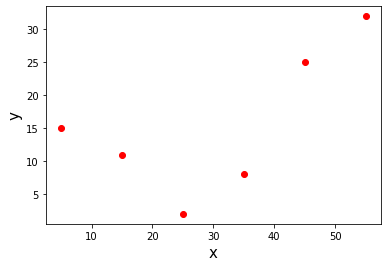

In [ ]:
x = np.array([5, 15, 25, 35, 45, 55])
y = np.array([15, 11, 2, 8, 25, 32])
plt.plot(x,y, 'ro')
plt.ylabel("y", fontsize=15)
plt.xlabel("x", fontsize=15)

plt.show(True)

In [ ]:
# define a transformação nos dados
transformer = PolynomialFeatures(degree=2, include_bias=False)
x = x.reshape((-1, 1))
transformer.fit(x)
print('Dados originais:\n', x)

# transforma os dados incluindo uma nova coluna com valores quadráticos
x_ = transformer.transform(x)
print('Novos dados:\n', x_)


Dados originais:
 [[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
Novos dados:
 [[   5.   25.]
 [  15.  225.]
 [  25.  625.]
 [  35. 1225.]
 [  45. 2025.]
 [  55. 3025.]]


In [ ]:
model = LinearRegression().fit(x_, y)
y_pred = model.predict(x_)

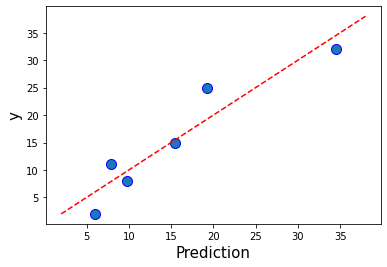

In [ ]:
fig = plt.figure()
l = plt.plot(y_pred, y, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra a reta diagonal, que representa a predição perfeita
xl = np.arange(min(y), 1.2*max(y),(max(y)-min(y))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)

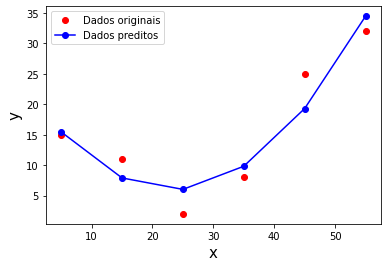

In [ ]:
plt.plot(x,y, 'ro', label='Dados originais')
plt.plot(x,y_pred, 'bo-', label = 'Dados preditos')
plt.ylabel("y", fontsize=15)
plt.xlabel("x", fontsize=15)
plt.legend()
plt.show(True)

In [ ]:
R2 = r2_score(y, y_pred)
print('R2:', R2)

R2: 0.8908516262498563


Portanto, para ajustar um modelo com variáveis não lineares, basta gerarmos um novo conjunto de dados inserindo novas colunas aos dados originais e realizar o procedimento de regressão multivariada. Cada coluna inserida contém os dados originais elevados a uma potência definida pelos termos do modelo.

